## My New Youtube Channel for AI (ML/DL/RL)

https://www.youtube.com/@guardiancoder


#### Please Watch, Like and Subscribe

-----------

# KERAS APPLICATIONS

* https://keras.io/api/applications/
* https://keras.io/api/layers/initializers/

# Use Pre Trained Model (AS IS)

In [222]:

from tensorflow.keras.applications.vgg16 import VGG16


The first time you run this example, Keras will download the weight files from the Internet and store them in the ~/.keras/models directory.



In [234]:

model = VGG16()

print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

 fc1 (Dense)         ------------           (None, 4096)         --------------        102764544 


In [235]:
((7* 7* 512)*4096) + 4096

102764544

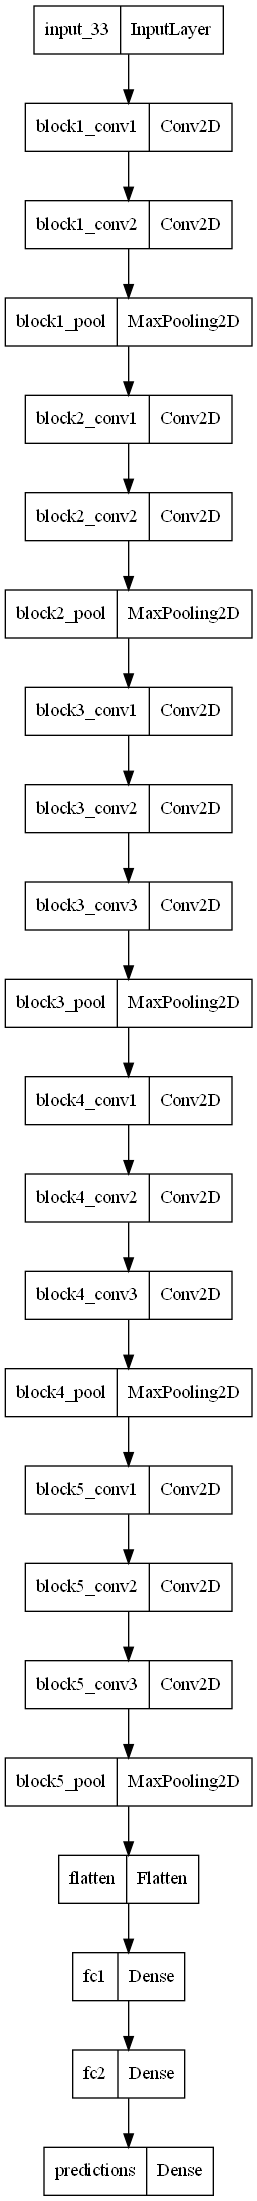

In [236]:

from keras.utils.vis_utils import plot_model


plot_model(model, to_file='vgg.png')



# Data Prep

In [256]:


from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.applications.vgg16 import preprocess_input




In [257]:

# load an image from file
image = load_img('dog.jpeg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

image

array([[[207., 187., 162.],
        [207., 187., 163.],
        [198., 180., 160.],
        ...,
        [231., 217., 180.],
        [238., 224., 187.],
        [228., 212., 176.]],

       [[201., 185., 160.],
        [207., 191., 168.],
        [196., 179., 159.],
        ...,
        [222., 210., 172.],
        [221., 209., 171.],
        [225., 211., 174.]],

       [[227., 215., 191.],
        [191., 176., 153.],
        [173., 158., 137.],
        ...,
        [203., 194., 155.],
        [224., 215., 176.],
        [208., 196., 158.]],

       ...,

       [[165., 146., 129.],
        [222., 183., 166.],
        [237., 199., 178.],
        ...,
        [215., 199., 174.],
        [188., 172., 146.],
        [179., 164., 133.]],

       [[150., 133., 113.],
        [177., 140., 122.],
        [205., 168., 150.],
        ...,
        [208., 192., 167.],
        [161., 145., 119.],
        [222., 207., 176.]],

       [[110.,  95.,  74.],
        [144., 108.,  94.],
        [180., 1

In [258]:
image.shape

(224, 224, 3)

In [259]:

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)


(1, image.shape[0], image.shape[1], image.shape[2]): This is the desired shape for the array. In this case, the array is being reshaped to have dimensions (1, height, width, channels).

1: This represents the batch size. By adding an extra dimension with size 1, we are effectively creating a batch of one image.

image.shape[0]: This represents the height of the image, preserving the original height from the image array.

image.shape[1]: This represents the width of the image, preserving the original width from the image array.

image.shape[2]: This represents the number of channels in the image, preserving the original number of channels from the image array. This could be 1 for grayscale images or 3 for RGB images.

In [260]:
image.shape

(1, 224, 224, 3)

# define the model

In [261]:


model = VGG16()

#imagenet data -- 1000 classes


In [262]:

# predict the probability across all output classes
yhat = model.predict(image)

yhat

1/1 [==============================] - 0s 488ms/step


array([[1.66008874e-07, 9.97113432e-08, 2.96097511e-07, 2.67804552e-07,
        1.02976503e-06, 3.28556865e-07, 2.17557727e-07, 8.23669416e-06,
        5.86880924e-06, 7.40113592e-07, 1.02812280e-07, 1.62104357e-07,
        1.88525235e-07, 1.96122741e-07, 8.26164467e-07, 3.51851440e-06,
        1.30165247e-07, 1.60356967e-06, 8.71319571e-07, 9.25965935e-08,
        1.12330326e-07, 3.62784192e-07, 5.43113458e-07, 1.37673385e-06,
        4.00535498e-07, 2.12144914e-06, 2.03192531e-06, 2.31136141e-06,
        2.63117727e-06, 6.92839876e-07, 1.53520219e-07, 4.25614644e-07,
        2.97003083e-07, 2.09891311e-07, 2.22353407e-07, 2.61037400e-07,
        2.99760160e-07, 2.11239262e-06, 4.37331323e-07, 3.44379799e-07,
        7.20614764e-07, 5.39758219e-07, 4.64987465e-07, 2.11095951e-07,
        8.06367780e-07, 2.07707316e-07, 7.90162176e-07, 3.35637651e-07,
        2.17320689e-07, 3.67307450e-07, 9.06004800e-07, 3.56702230e-07,
        3.00622446e-07, 8.87625674e-07, 9.27210635e-07, 3.234615

# fetch the result

In [263]:
import numpy as np

np.argmax(yhat)

236

In [264]:
#Doberman, Doberman pinscher


https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [265]:
yhat[0][236]

0.35419115

In [266]:
from tensorflow.keras.applications.vgg16 import decode_predictions


In [59]:
??decode_predictions


In [267]:

# convert the probabilities to class labels

#top 5 predictions

label = decode_predictions(yhat)

label

[[('n02107142', 'Doberman', 0.35419115),
  ('n02105412', 'kelpie', 0.19439045),
  ('n02106550', 'Rottweiler', 0.16862364),
  ('n02089078', 'black-and-tan_coonhound', 0.13516638),
  ('n02107312', 'miniature_pinscher', 0.038150016)]]

In [268]:
# retrieve the most likely result, e.g. highest probability

label = label[0][0]

label

('n02107142', 'Doberman', 0.35419115)

In [276]:


# print the classification
print('Output is --\n%s (%.2f)' % (label[1], label[2]*100))

Output is --
Doberman (35.42)
